In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [13]:
# Load the datasets
tracking_files_pattern = "data/tracking_week_*.csv"
plays_path = 'data/plays.csv'
players_path = 'data/players.csv'

plays = pd.read_csv(plays_path)
players = pd.read_csv(players_path)

tracking_files = glob.glob(tracking_files_pattern)
tracking_data_list = []
for file in tracking_files:
    df = pd.read_csv(file)
    tracking_data_list.append(df)
tracking_data = pd.concat(tracking_data_list, ignore_index=True)

In [14]:
# Merge the 'position' column from the players dataset
tracking_data = pd.merge(
    tracking_data,
    players[['nflId', 'position']],
    on='nflId',
    how='left'
)

# Filter for rows where 'position' is 'QB' and 'event' is 'ball_snap'
tracking_filtered = tracking_data[
    (tracking_data['position'] == 'QB') & (tracking_data['event'] == 'ball_snap')
]

# Select required columns from tracking data
tracking_reduced = tracking_filtered[['nflId', 'gameId', 'playId', 'displayName', 'x', 'y']]

# Filter plays dataset for relevant columns and drop NaNs
plays_filtered = plays[['gameId', 'playId', 'targetX', 'targetY', 'pff_passCoverage']].dropna()

# Merge tracking data with plays data
merged_data = pd.merge(tracking_reduced, plays_filtered, on=['gameId', 'playId'], how='inner')

# Rename columns 'x' to 'qbX' and 'y' to 'qbY'
merged_data.rename(columns={'x': 'qbX', 'y': 'qbY'}, inplace=True)

merged_data.tail(15)

,nflId,gameId,playId,displayName,qbX,qbY,targetX,targetY,pff_passCoverage
8397,53496.0,2022110300,2284,Davis Mills,86.62,23.85,89.02,29.98,Cover-3
8398,53496.0,2022110300,2308,Davis Mills,94.10,29.84,93.97,15.24,Cover-1
8399,53496.0,2022110300,2500,Davis Mills,26.82,23.80,6.51,1.83,Red Zone
8400,52461.0,2022110300,2556,Jalen Hurts,33.11,29.87,40.38,10.39,Cover-3 Seam
8401,52461.0,2022110300,2646,Jalen Hurts,71.93,29.72,53.02,34.94,Cover-3
8402,52461.0,2022110300,2670,Jalen Hurts,55.29,29.81,36.36,42.04,Cover-1
8403,52461.0,2022110300,2716,Jalen Hurts,45.16,29.77,39.07,22.28,Cover-1
8404,52461.0,2022110300,2782,Jalen Hurts,18.87,23.48,10.82,38.50,Cover-0
8405,53496.0,2022110300,2947,Davis Mills,58.09,27.73,69.55,50.51,Cover-3 Seam
8406,53496.0,2022110300,2981,Davis Mills,61.49,28.11,80.08,1.85,Cover-3


In [17]:
merged_data.shape

(8412, 9)

In [15]:
# Group by unique coverages, excluding 'Red Zone' and 'Goal Line'
coverages_to_plot = merged_data['pff_passCoverage'].unique()
coverages_to_plot = [c for c in coverages_to_plot if c not in ['Red Zone', 'Goal Line']]

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


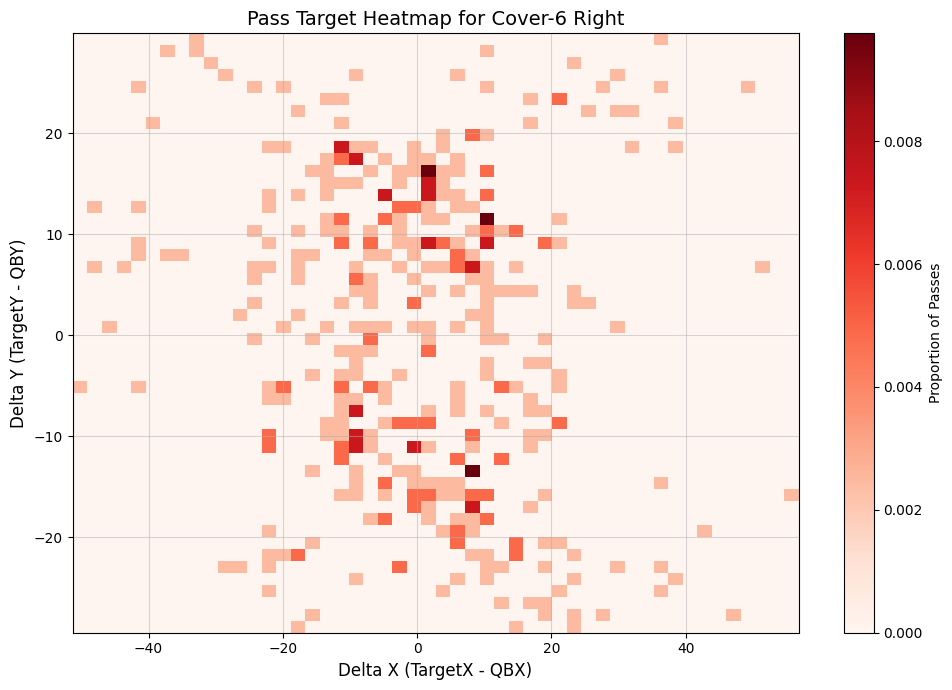

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


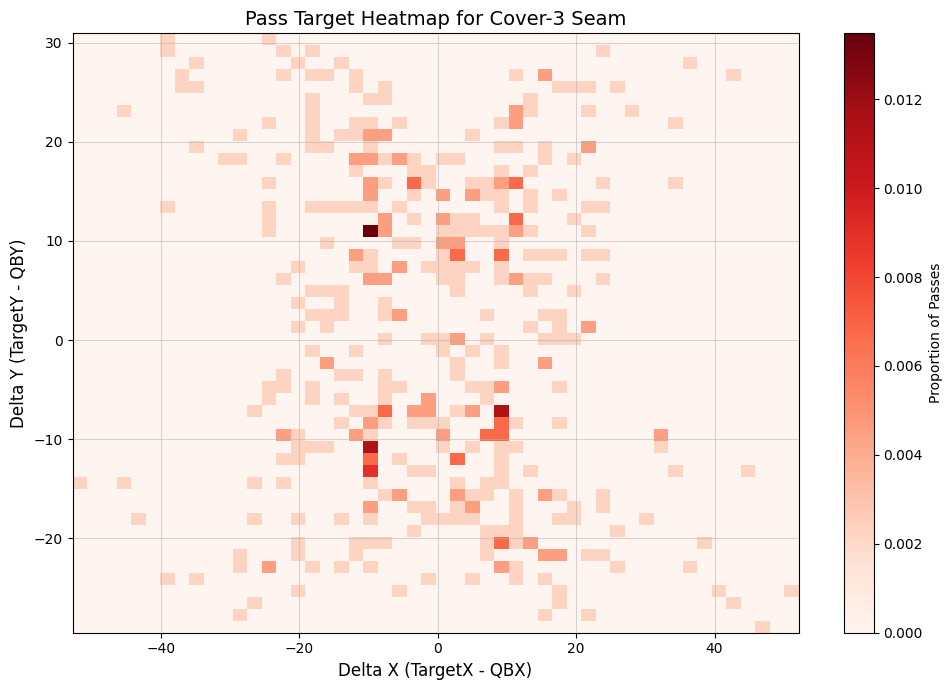

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


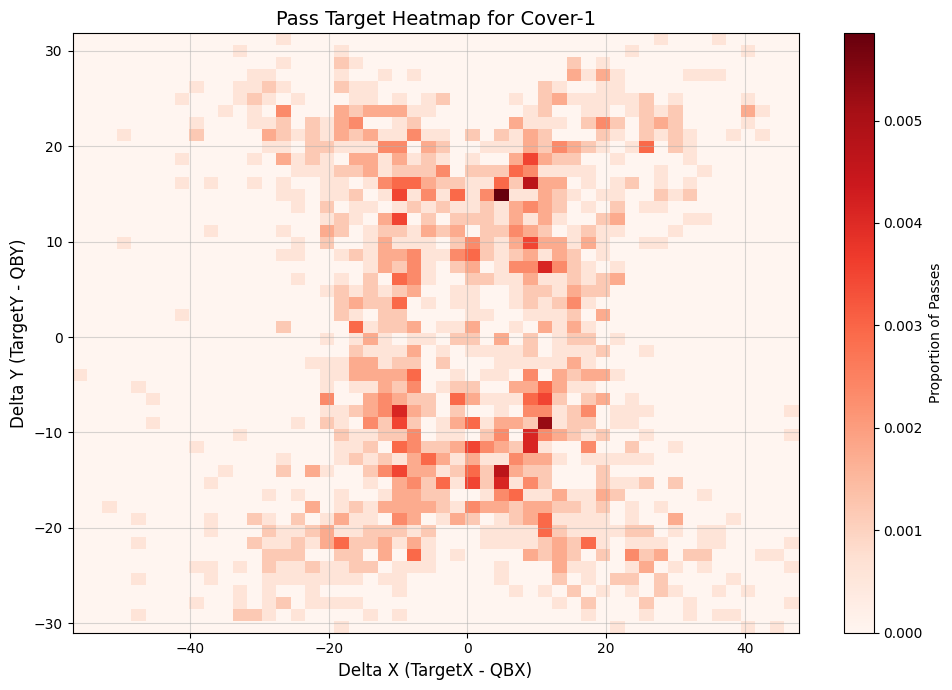

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


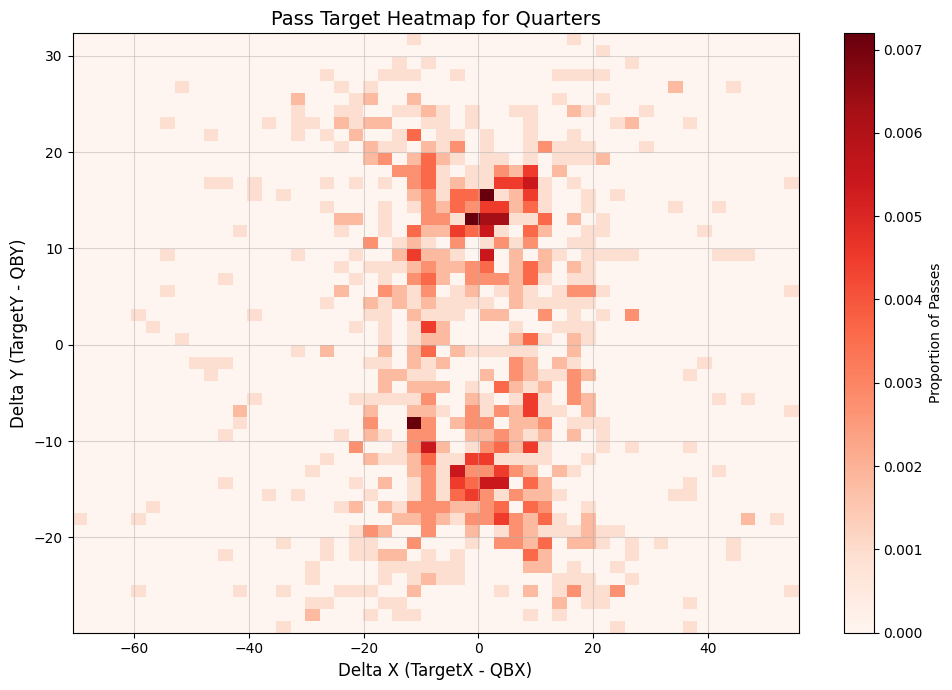

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


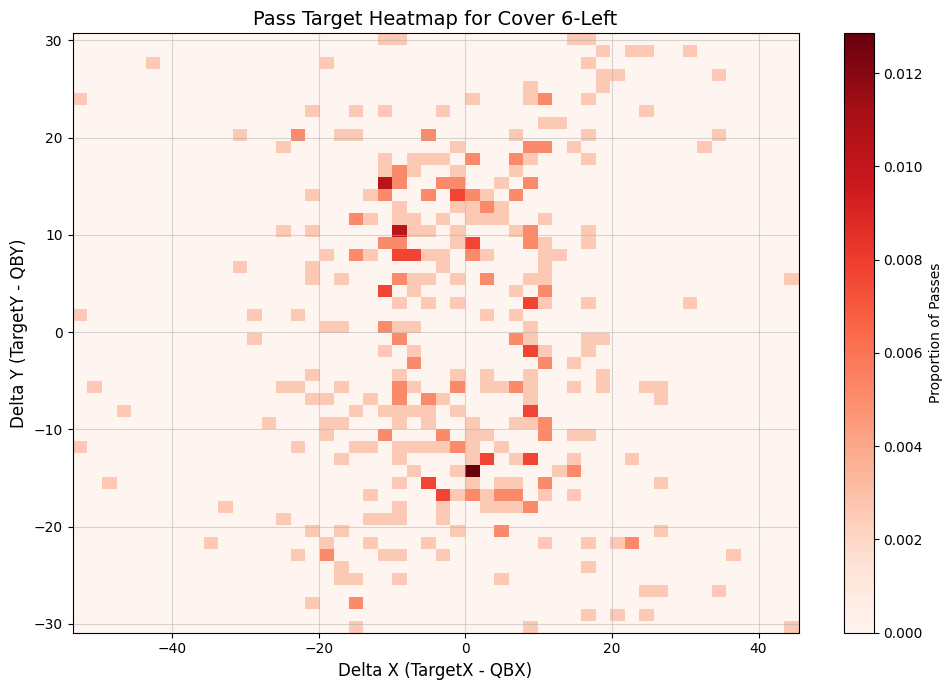

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


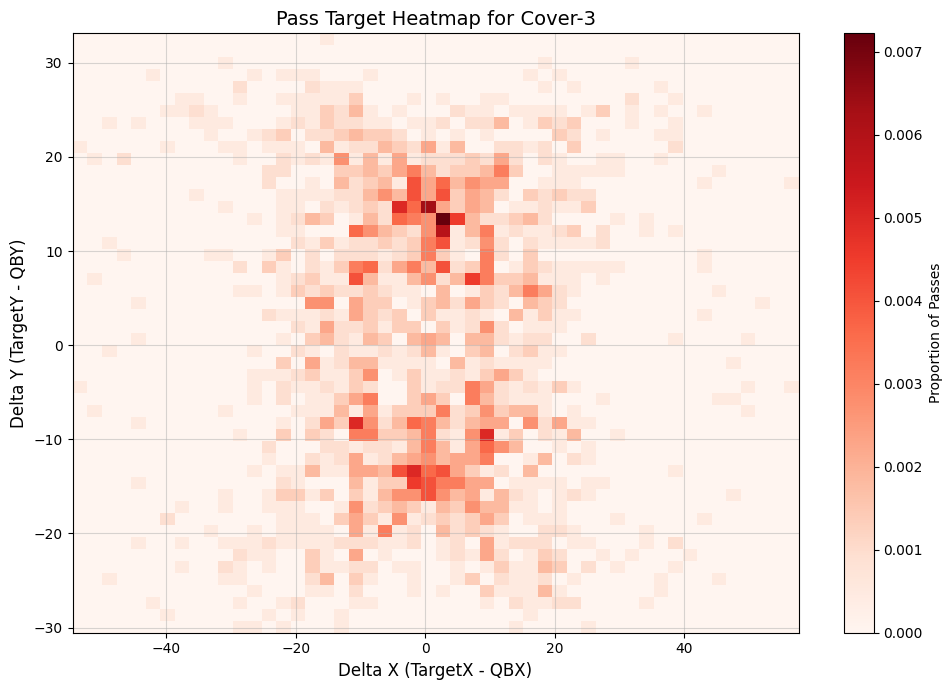

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


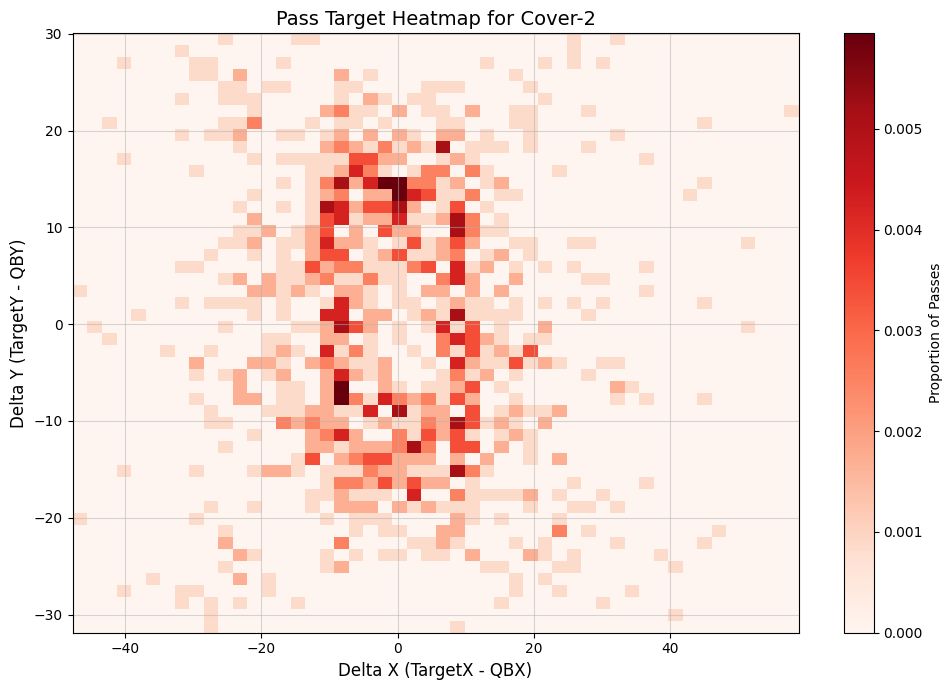

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


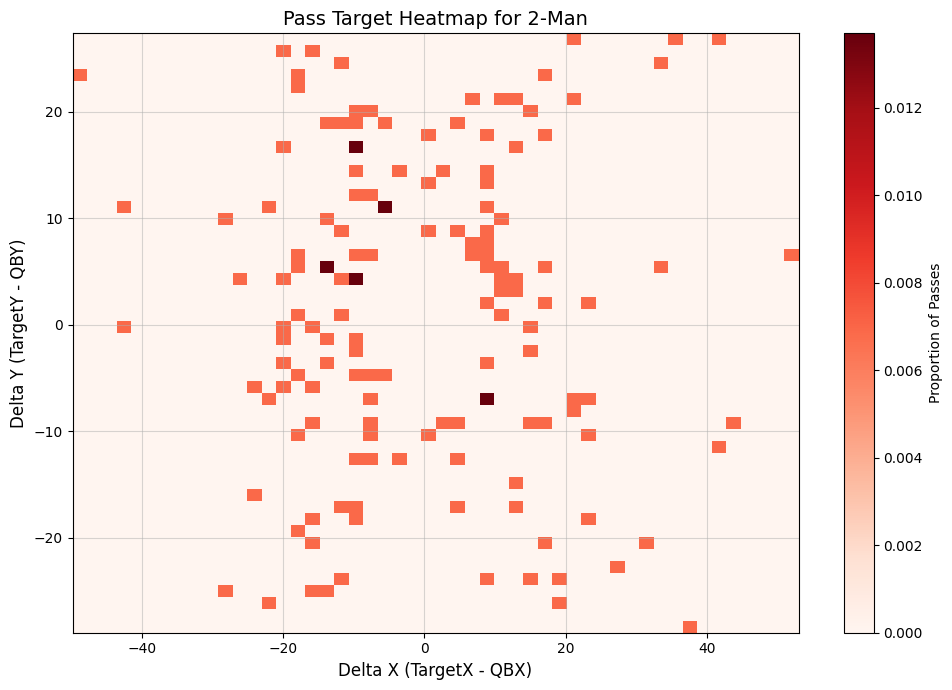

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


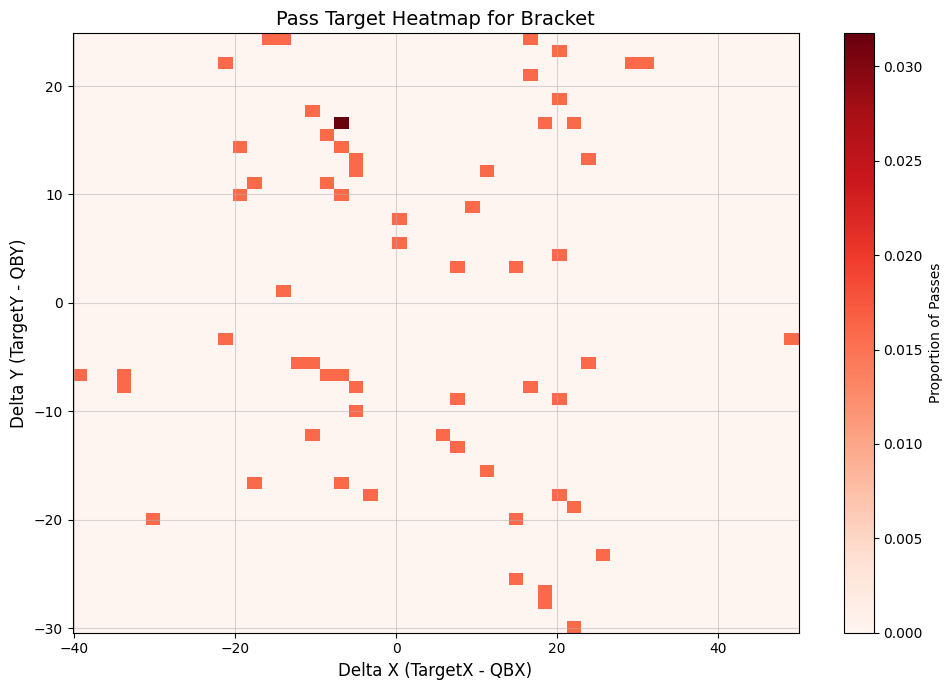

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


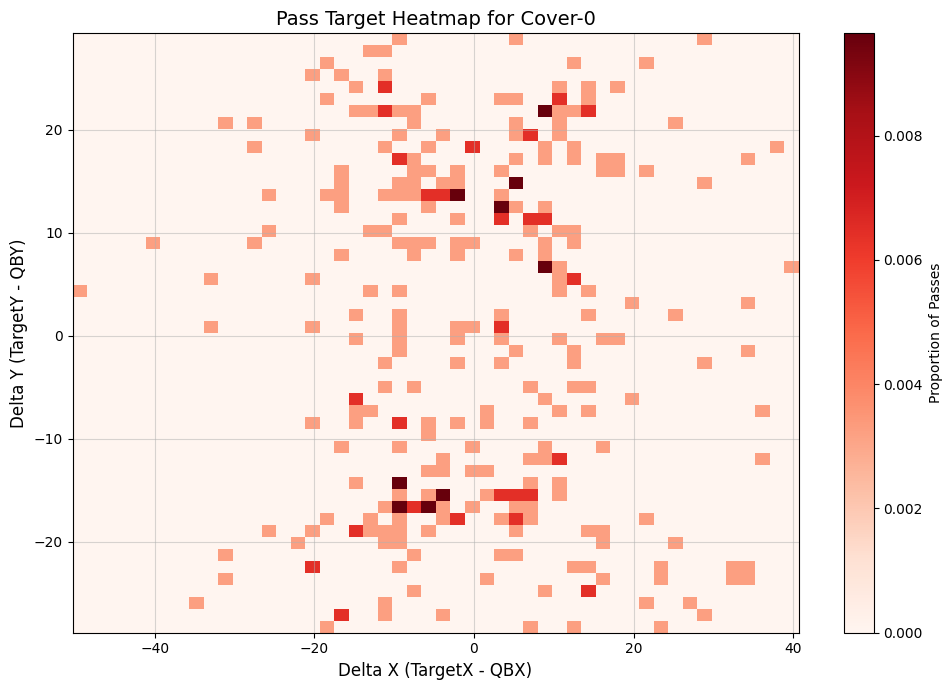

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


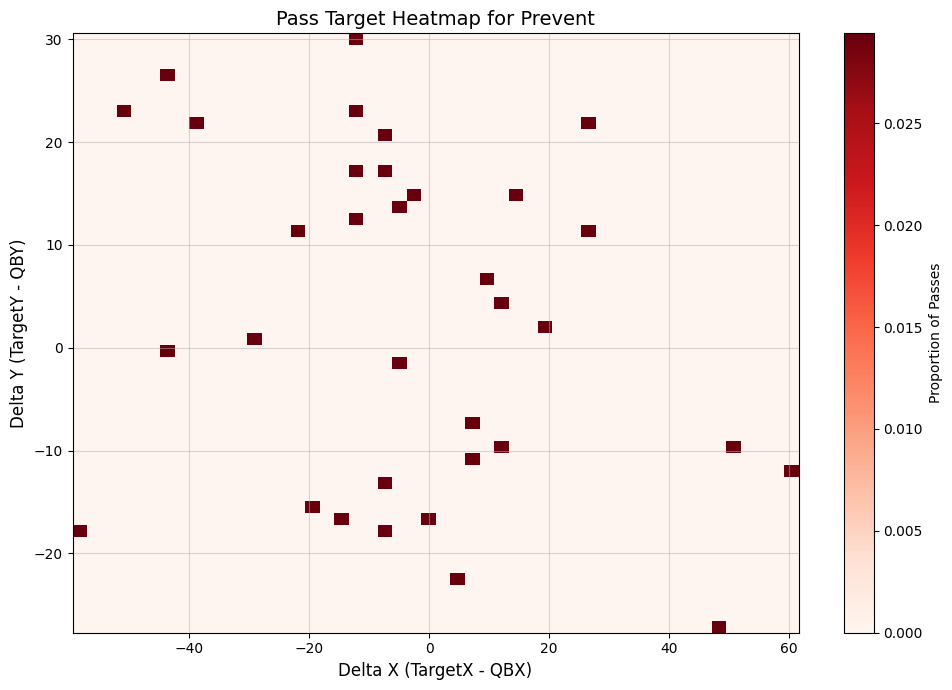

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


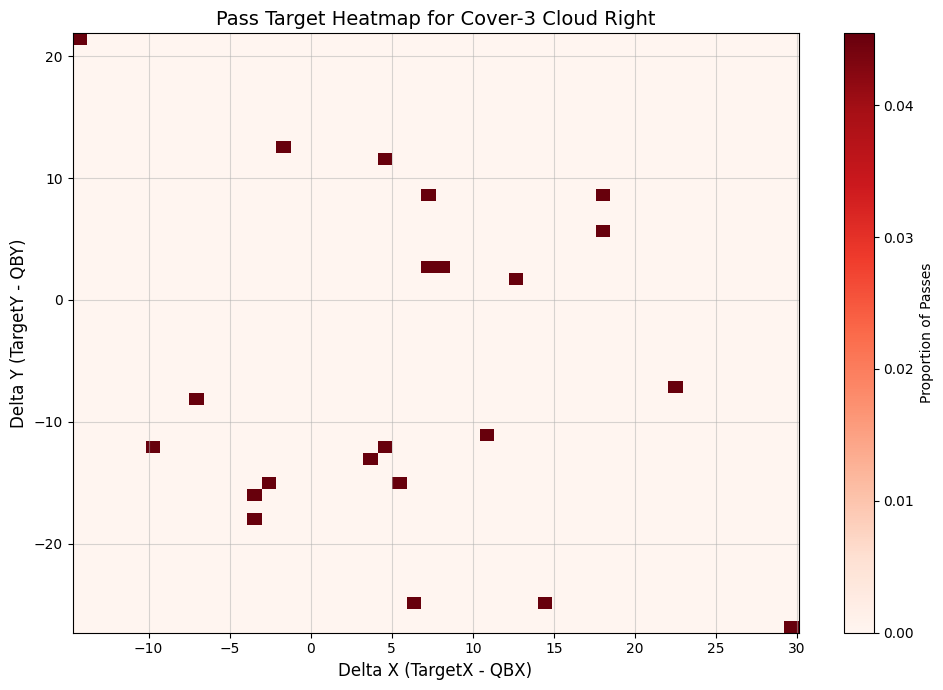

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


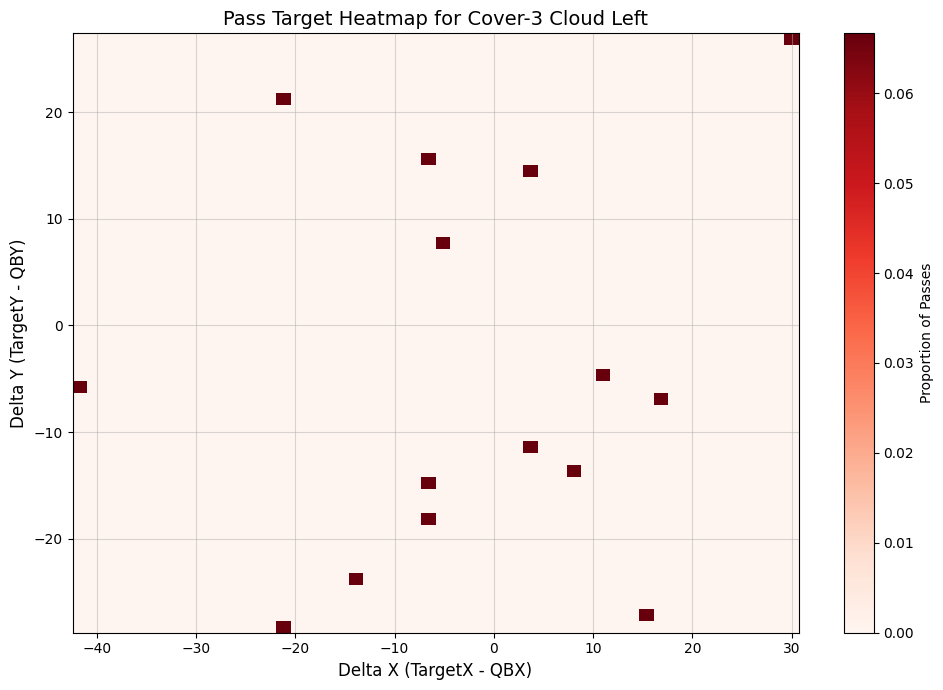

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


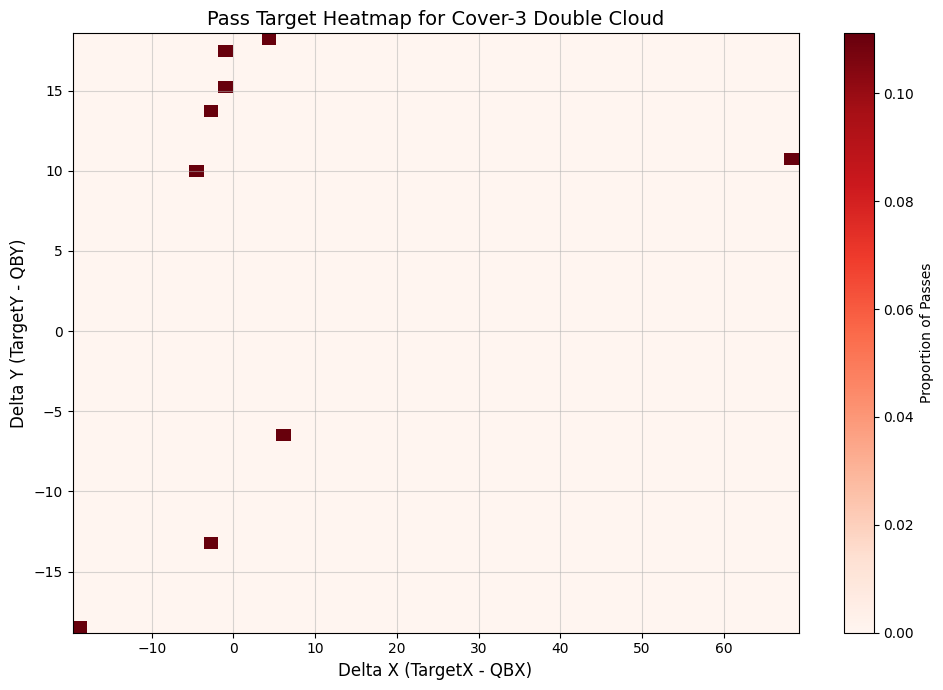

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


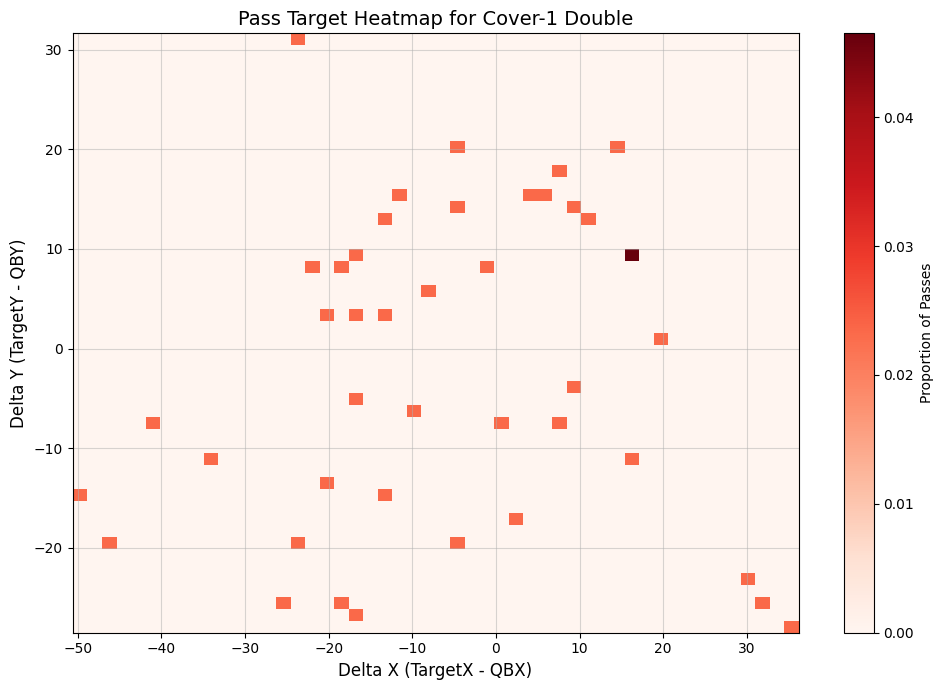

C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
C:\Users\nadee_4wl0sna\AppData\Local\Temp\ipykernel_11800\1285728739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']


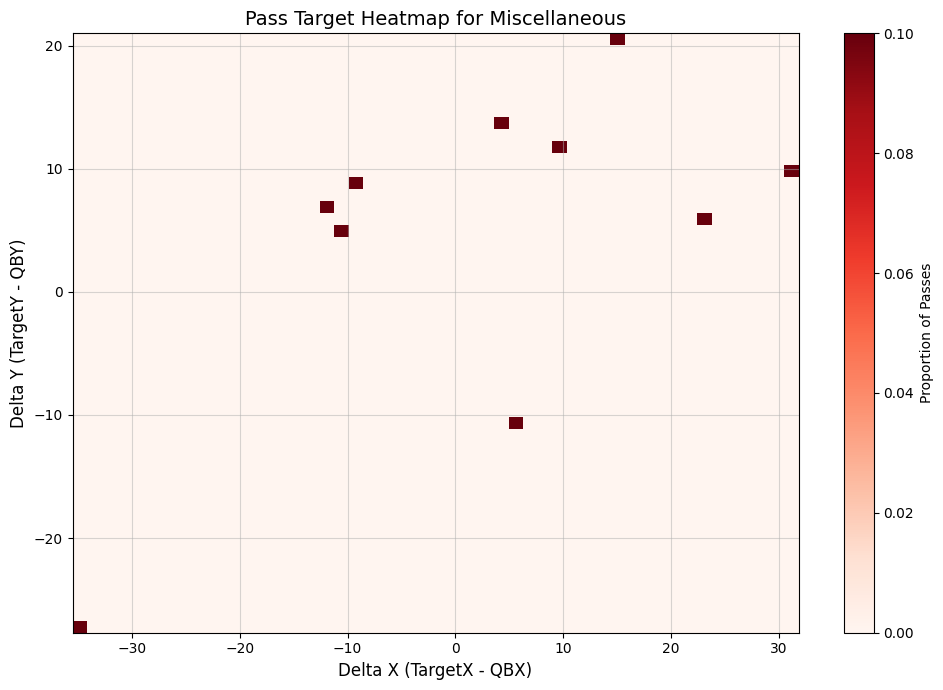

In [16]:
# Create heatmaps for each coverage
for coverage in coverages_to_plot:
    # Filter the data for the current coverage
    coverage_data = merged_data[merged_data['pff_passCoverage'] == coverage]
    
    # Calculate delta X and delta Y
    coverage_data['deltaX'] = coverage_data['targetX'] - coverage_data['qbX']
    coverage_data['deltaY'] = coverage_data['targetY'] - coverage_data['qbY']
    
    # Create a 2D histogram (heatmap) of relative positions
    heatmap, xedges, yedges = np.histogram2d(
        coverage_data['deltaX'],
        coverage_data['deltaY'],
        bins=(50, 50)
    )
    
    # Convert to proportions
    heatmap = heatmap / heatmap.sum()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    plt.imshow(
        heatmap.T, origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
        cmap='Reds', aspect='auto'
    )
    plt.colorbar(label='Proportion of Passes')
    plt.title(f'Pass Target Heatmap for {coverage}', fontsize=14)
    plt.xlabel('Delta X (TargetX - QBX)', fontsize=12)
    plt.ylabel('Delta Y (TargetY - QBY)', fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    
    # Save the plot
    # plt.savefig(f'{coverage}_pass_target_heatmap.png')
    plt.show()